In [1]:
from pandas import read_csv

import bowtie as bow

%matplotlib inline

# The geometric factor
---
<span style="font-size:1.5em;">
The geometric factor, often denoted as $G \delta E$ [cm$^{2}$ sr MeV], is a physical quantity that characterizes a particle instrument's response to a charged particle distribution. Knowledge of the geometric factor is required to convert particle counts (directly measured quantity) to the physical unit of intensity (estimated quantity).
    
The geometric factor is often extremely challenging - sometimes even impossible - to analytically calculate, and hence it is often determined either experimentally or numerically using e.g., Monte Carlo simulations.

The result of bowtie analysis is the geometric factor and an effective energy for an energy channel.
</span>

# An example on how to apply the Bowtie package for your instrument's response functions:
---
<span style="font-size:1.5em;">
    
In this example notebook we read in the electron response functions for the Side 0 of BepiColombo / SIXS-P instrument.
    
We walk through on how to initialize and use the Bowtie class to run bowtie-analysis on response functions for different particle spectra.

Finally we save the result of analysis to a csv table.
</span>

In [2]:
# The input data is given as a csv table. The channel responses must be indexed by incident energy
response_df = read_csv("sixs_side0_electron_responses.csv", index_col="incident_energy")

# Display the dataframe to see that it was read in correctly
display(response_df)

,E1,E2,E3,E4,E5,E6,E7
incident_energy,,,,,,,
0.010045,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010227,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010413,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
193690.970402,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195440.977005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197206.794997,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Initialize the Bowtie object with an energy range (in MeV) and the response data

energy_min = 0.01
energy_max = 50.

bowtie = bow.Bowtie(energy_min=energy_min, energy_max=energy_max, data=response_df)

## About the Bowtie class
---

The `Bowtie` class contains the data that the bowtie analysis is applied on, and the energy range to be considered in the calculations. Its methods make running analysis easy and straighforward. \
`Bowtie`'s methods are:
### .set_energy_range(energy_min, energy_max):

    energy_min : {float} The minimum energy in MeV to consider. 
    energy_max : {float} The maximum energy to consider.

### .bowtie_analysis(channel, spectra, plot):
    
    channel : {str} The channel column name as it appears in the csv file.
    spectra : {Spectra} The Spectra class object, introduced in this package.
    plot : {bool} A boolean switch to produce a plot that visualizes the analysis results.

### bowtie_analysis_full_stack(spectra, plot):
    
Wrapper for `bowtie_analysis()`. Runs the analysis on all channels that appear in the input file.

In [4]:
# Next up initialize a range of spectra, starting from minimum to maximum with an amount of steps

gamma_min = -5.5
gamma_max = -2.5
num_of_spectra = 100

spectra = bow.Spectra(gamma_min=gamma_min, gamma_max=gamma_max, gamma_steps=num_of_spectra)

## About the Spectra class
---
The `Spectra` class contain the range of spectra that are applied on the response function to run bowtie analysis \
`Spectra`'s methods are:
### .set_spectral_indices(gamma_min, gamma_max):
    
    gamma_min : {float} The minimum spectral index to consider in the calculation.
    gamma_max : {float} The maximum spectral index to consider in the calculation.

### .produce_power_law(response_df) :
    
    response_df : The pandas DataFrame that contains the incident energies and respective responses.


In [5]:
# Produces the power law spectra with given spectral indices for the energies 
# in the response dataframe indices.
# The range of power law spectra are stored inside the Spectra object.
spectra.produce_power_law_spectra(response_df)

In [6]:
# The power law spectra are stored as a class variable called "power_law_spectra".
# power_law_spectra is a list of dictionaries, that contains a spectrum for each value of
# spectral index.
# User need necessarily not care about it.
spectra.power_law_spectra

[{'gamma': np.float64(-5.5),
  'spect': array([1.00000000e-30, 7.26126860e+10, 6.92973237e+10, ...,
         7.54969980e-30, 7.18530666e-30, 6.83850129e-30], shape=(1870,))},
 {'gamma': np.float64(-5.46969696969697),
  'spect': array([1.00000000e-30, 6.31806367e+10, 6.03123610e+10, ...,
         1.09240043e-29, 1.03995814e-29, 9.90033417e-30], shape=(1870,))},
 {'gamma': np.float64(-5.4393939393939394),
  'spect': array([1.00000000e-30, 5.49737666e+10, 5.24923719e+10, ...,
         1.58064390e-29, 1.50517296e-29, 1.43330552e-29], shape=(1870,))},
 {'gamma': np.float64(-5.409090909090909),
  'spect': array([1.00000000e-30, 4.78329307e+10, 4.56863081e+10, ...,
         2.28710560e-29, 2.17849695e-29, 2.07504584e-29], shape=(1870,))},
 {'gamma': np.float64(-5.378787878787879),
  'spect': array([1.00000000e-30, 4.16196561e+10, 3.97627060e+10, ...,
         3.30931719e-29, 3.15302566e-29, 3.00411542e-29], shape=(1870,))},
 {'gamma': np.float64(-5.348484848484849),
  'spect': array([1.000000

/home/chospa/bepicolombo/bowtie-master/bowtie-main/bowtie/plotutil.py:84: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes.grid(grid, which='both', alpha=0.3, zorder=0)


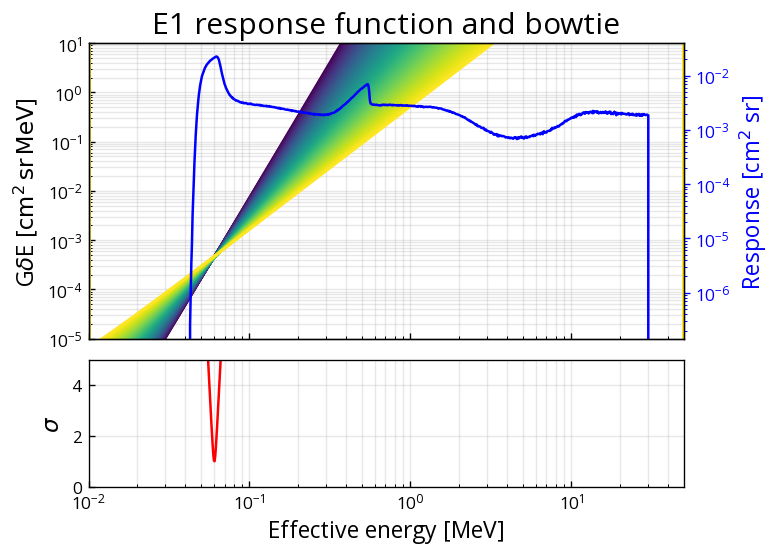

In [7]:
# bowtie_analysis is a class method for a single channel bowtie analysis with the given spectra
# The method takes as an input the channel on which bowtie analysis is applied on, the range of 
# spectra used (contained in the spectra object that we initialized earlier) and a boolean switch
# to produce a plot to visualize the calculation.

channel = "E1"
produce_plot = True

e1_results = bowtie.bowtie_analysis(channel=channel, spectra=spectra, plot=produce_plot)

### The bowtie_analysis()-method returns a dictionary that contains the results of the analysis.
    geometric_factor : {float} The geometric factor G\DeltaE in cm^2 sr MeV
    geometric_factor_errors (absolute) : {dict} with 'gfup' : {float}, and 'gflo' : {float}
    effective_energy : {float} The effective energy in MeV
    fig : {plt.Fig} if plot==True. The figure that visualizes the spectra and the response function
    ax : {tuple(plt.Axes)} if plot==True. The two pairs of axes of the figure.

In [8]:
e1_results

{'geometric_factor': 0.00046108443865681666,
 'geometric_factor_errors': {'gfup': 1.211669671885579e-05,
  'gflo': 8.045747419734267e-06},
 'effective_energy': 0.0607020174186593,
 'fig': <Figure size 768x576 with 2 Axes>,
 'axes': (<Axes: title={'center': 'E1 response function and bowtie'}, ylabel='G$\\delta$E [${\\rm cm}^2\\,{\\rm sr}\\,{\\rm MeV}$]'>,
  <Axes: xlabel='Effective energy, MeV', ylabel='$\\sigma$'>)}

### Running the analysis on a different set of spectra:

If one wants to tune the limits of spectra used in the analysis, it can easily be done with the `.set_spectral_indices()`-method, and reproducing a set of power law spectra with `.produce_power_law_spectra()`.

In [9]:
new_gamma_min = -3.5
new_gamma_max = -1.5

spectra.set_spectral_indices(gamma_min=new_gamma_min, gamma_max=new_gamma_max)
spectra.produce_power_law_spectra(response_df=response_df)

With a different set of spectra, bowtie analysis will yield different results.

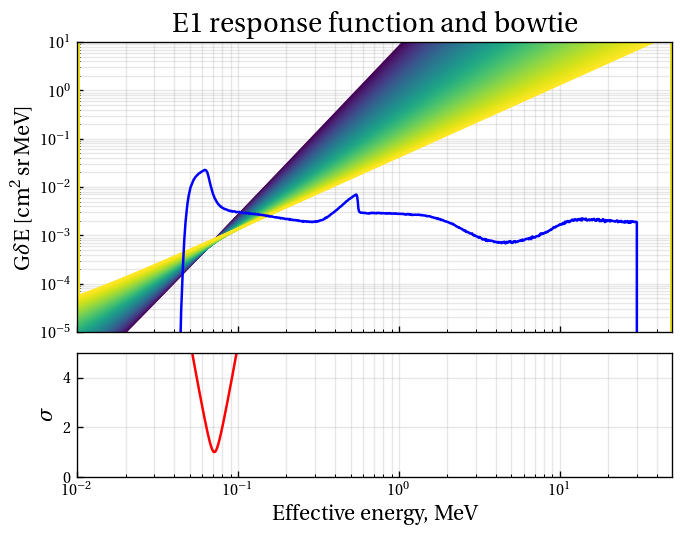

{'geometric_factor': 0.000744084026271278,
 'geometric_factor_errors': {'gfup': 4.407576153642298e-05,
  'gflo': 3.07655324791197e-05},
 'effective_energy': 0.0713699882077903,
 'fig': <Figure size 768x576 with 2 Axes>,
 'axes': (<Axes: title={'center': 'E1 response function and bowtie'}, ylabel='G$\\delta$E [${\\rm cm}^2\\,{\\rm sr}\\,{\\rm MeV}$]'>,
  <Axes: xlabel='Effective energy, MeV', ylabel='$\\sigma$'>)}

In [10]:
new_e1_results = bowtie.bowtie_analysis(channel=channel, spectra=spectra, plot=produce_plot)
new_e1_results

### Running the analysis on all channels in the file:

The `bowtie_analysis_full_stack()`-method is a wrapper for the `bowtie_analysis()`-method. It runs bowtie analysis automatically on all the columns in the csv table that was fed to the Bowtie class. The method returns a list that contains a dictionary of results described above for each channel.

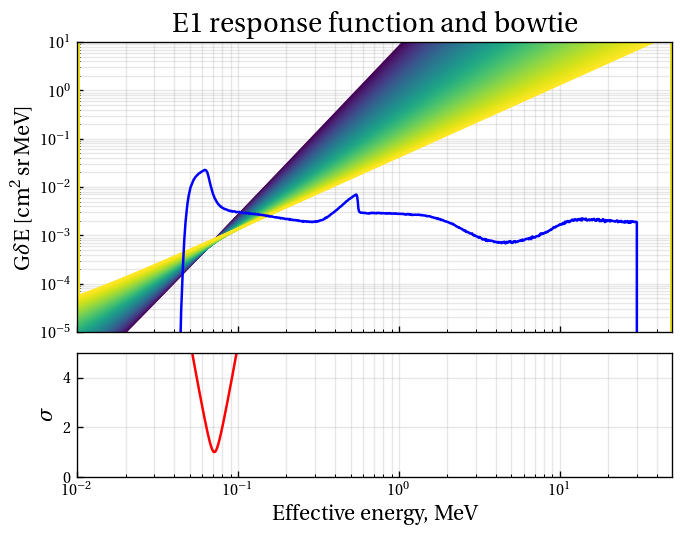

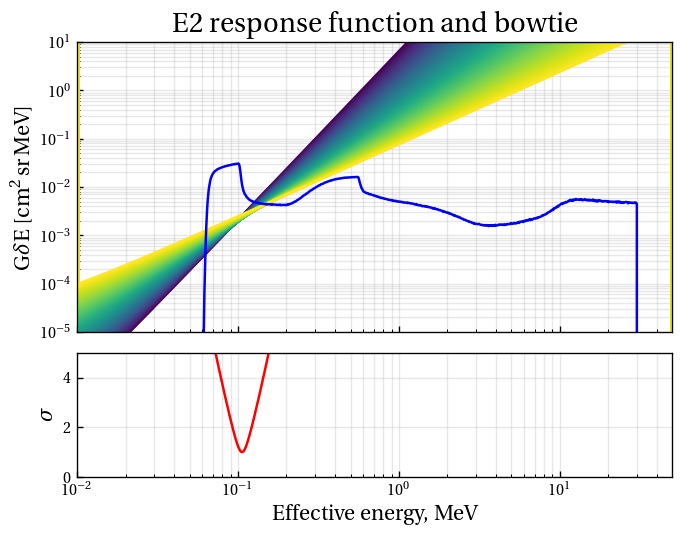

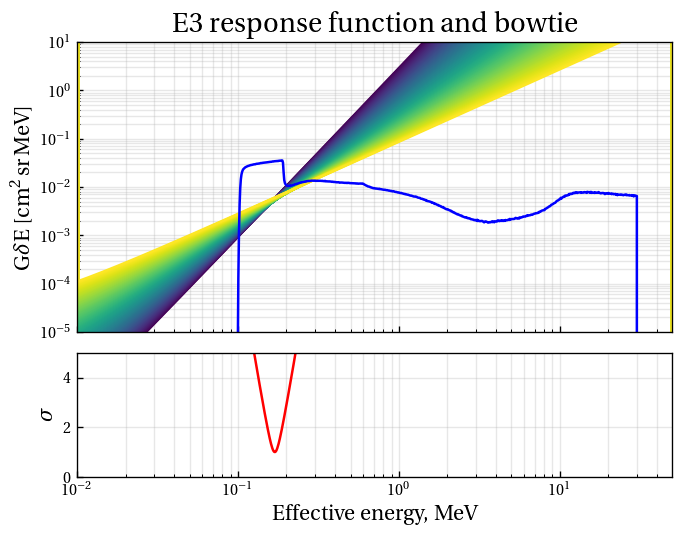

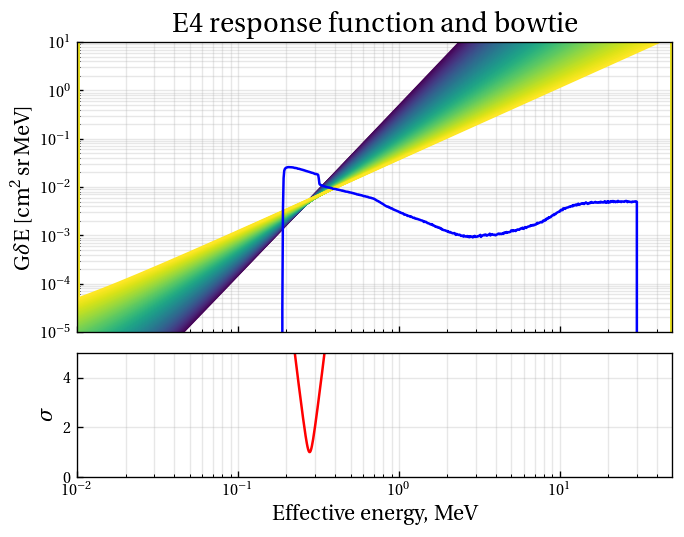

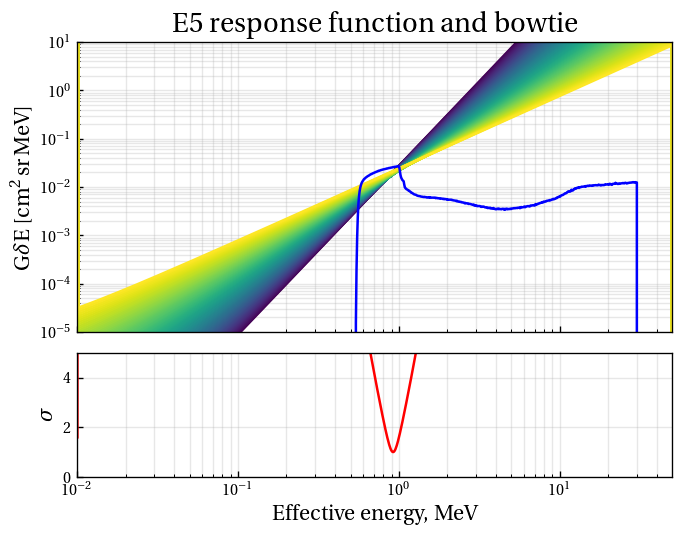

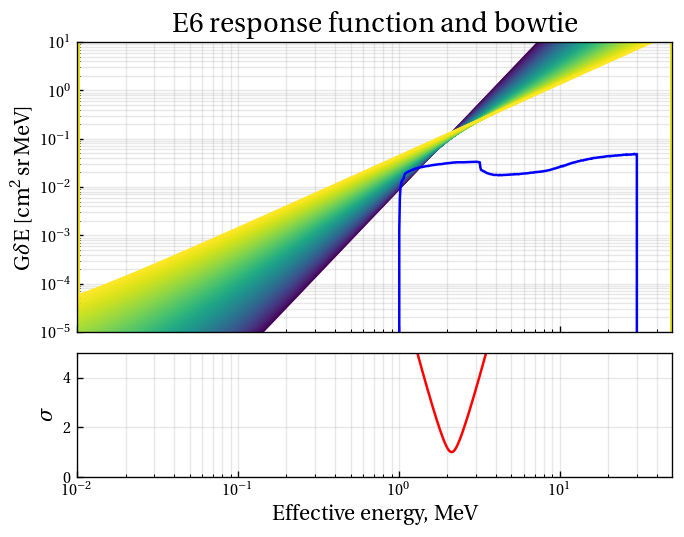

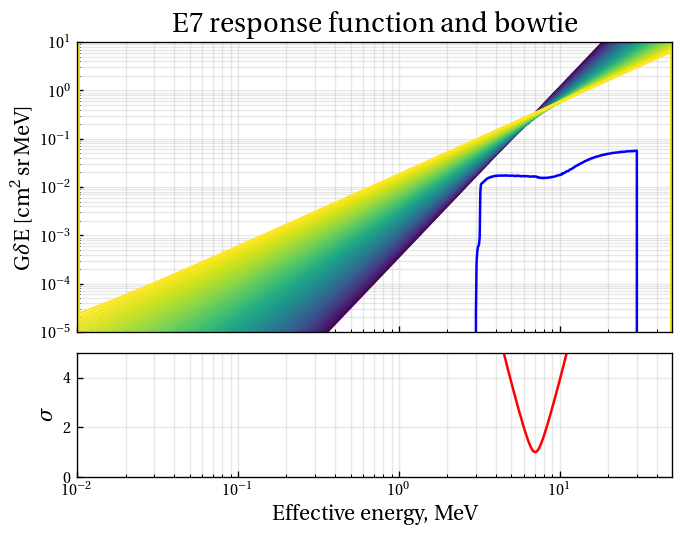

In [11]:
# 
all_channels_results = bowtie.bowtie_analysis_full_stack(spectra=spectra, plot=produce_plot)

## Saving the results to a file (and figures):
---

The utility function `save_results()` saves the results of analysis to a csv table, where each channels gets its own column, and the results (geometric factor, its errors and the effective energy) are listed as rows.

`save_results()` accepts the following parameters:

results : {list[dict]} A list of results, as returned by the `.bowtie_analysis_full_stack()`-method. 
    
filename : {str} A name for the file that you save the results into.

column_names : {list} The names for the columns in the csv table. Optional.

save_figures : {bool} A boolean switch to also save the figures (if one produced them). Optional.


In [12]:
# Input parameters for the saving function
filename = "name_for_your_table.csv"

# Same column names as in the input csv.
column_names = response_df.columns

save_figures = False

bow.bowtie_util.save_results(results=all_channels_results, filename=filename, 
                             column_names=column_names, save_figures=save_figures)